# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [2]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [3]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, '+', alpha=0.3, label=label)

Read the GSS data again.

In [4]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 35.5 ms, sys: 24 ms, total: 59.5 ms
Wall time: 58.3 ms


(62466, 101)

In [5]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [6]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

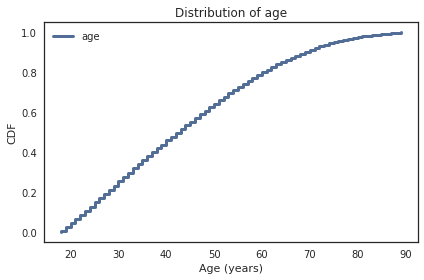

In [7]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation: Above age 50, the data follows a relatively normal distribution with some variation, but below 50 the data is far too linear to fit the sigmoid of a normal distrobution. This is likely because populations have a relatively uniform distrobution until the age where it is more likely to start passing away. The line likely starts at 18 because that is the minimum age of respondents. 

n, mean, std 62281 44.47905368874617 16.482037485676


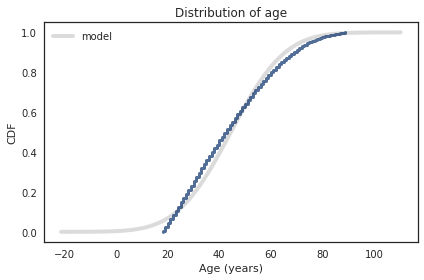

In [8]:
MakeNormalModel(gss.age.dropna(), label='')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

2) Here's a normal probability plot for the distribution of ages.

Interpretation: This confirms that the center of the data, roughly fits a normal distrobution, following this trend longer in the older population. However the tails, particularly in the younger population case, deviate substatially. So, if you are specifically examing either of the extremes this would be a poor representation. 

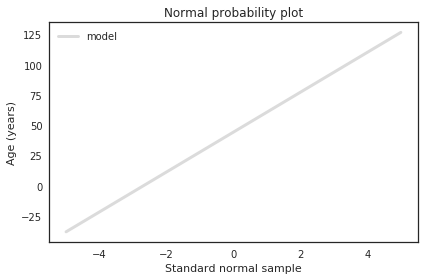

In [9]:
MakeNormalPlot(gss.age.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

3) Here's the complementary CDF on a log-y scale.

Interpretation: This model indicates that an exponential function is not a good representation of age distrobution.

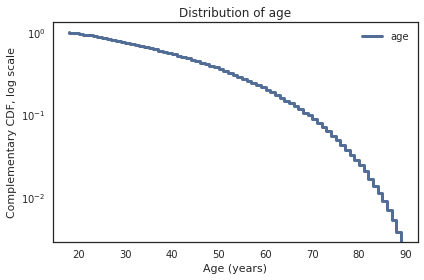

In [10]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF of ages on a log-x scale.

Interpretation: This figure shows that a log scale in years causes the younger population to have a shallower slope than the center as opposed to continuing linearly, suggesting that a log normal model might be appropriate. 

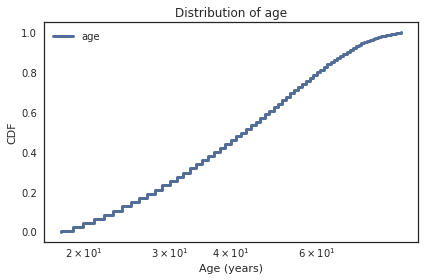

In [11]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation: This shows that a log normal distribution models the data better than the normal distrobution, particularly in for the younger population. 

n, mean, std 62281 1.6168744157503179 0.16787914328916784


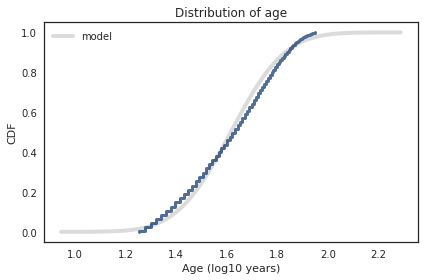

In [12]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

Interpretation: Comapred to the earlier normal distibution test, the portion of the data following the line has shifted down, confirming that the log normal distibution better models te younger population.

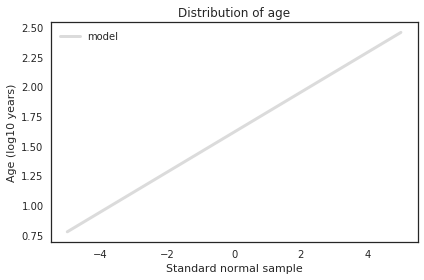

In [13]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

Interpretation: This indicates that a pareto distobution is not a useful model of age distribution.

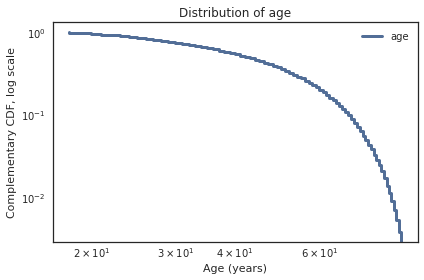

In [14]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation: A weibull distribution is also not a meaningful representation of age ditribution. 

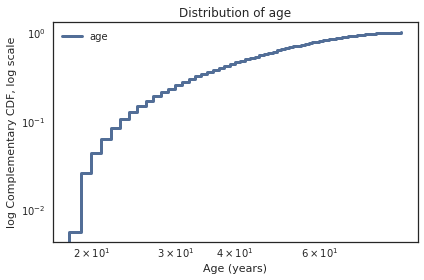

In [15]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

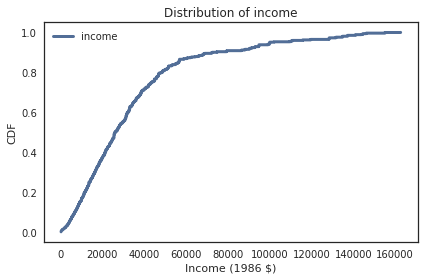

In [22]:
cdf_income = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

n, mean, std 55499 33882.52181307481 28502.895120969348


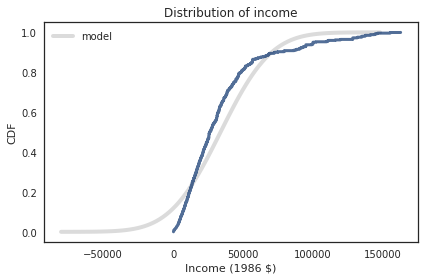

In [23]:
MakeNormalModel(gss.realinc.dropna(), label='')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

2) Here's a normal probability plot for the values.

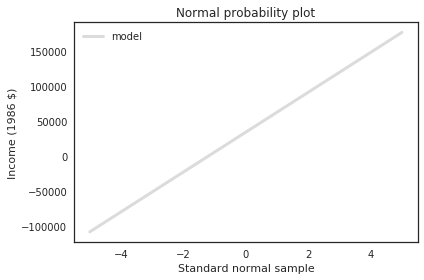

In [24]:
MakeNormalPlot(gss.realinc.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Income (1986 $)')

3) Here's the complementary CDF on a log-y scale.

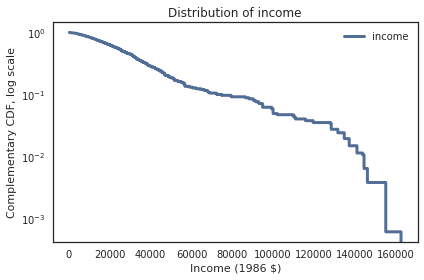

In [25]:
thinkplot.cdf(cdf_income, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF on a log-x scale.

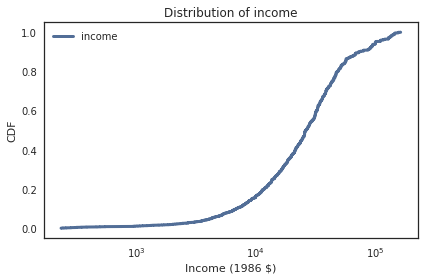

In [26]:
thinkplot.cdf(cdf_income, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of the values, compared to a normal model.

n, mean, std 55499 4.381031736514132 0.3856600273208646


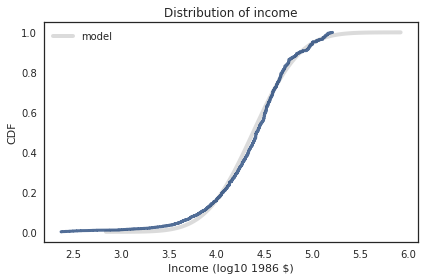

In [27]:
values = np.log10(gss.realinc.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of income', 
         xlabel='Income (log10 1986 $)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of the values.

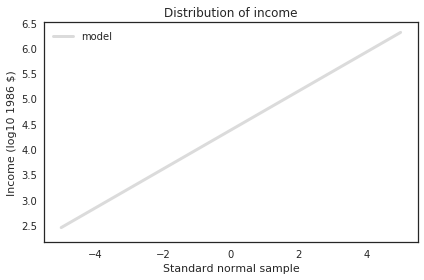

In [28]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of income', 
         xlabel='Standard normal sample', 
         ylabel='Income (log10 1986 $)')

7) Here's the complementary CDF on a log-log scale.

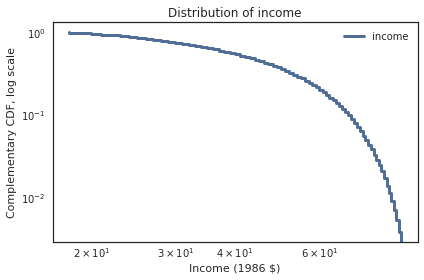

In [29]:
thinkplot.cdf(cdf_age, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

Interpretation: A log normal distribution seems to approximate the data pretty well within two standard deviations. 

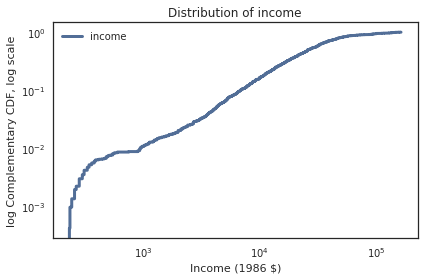

In [30]:
thinkplot.cdf(cdf_income, label='income', transform='Weibull')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

## BRFSS


In [31]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

CPU times: user 0 ns, sys: 7.52 ms, total: 7.52 ms
Wall time: 6.74 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

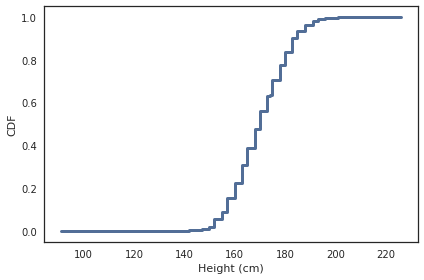

In [32]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [33]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

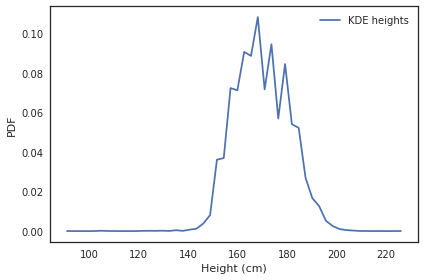

In [34]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

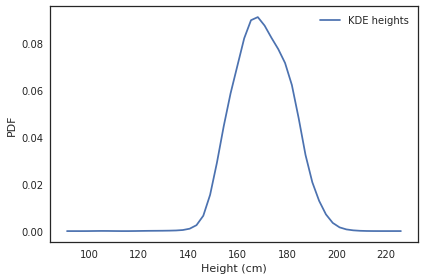

In [35]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [36]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191394)

Here's the model compared to the estimated PDF.

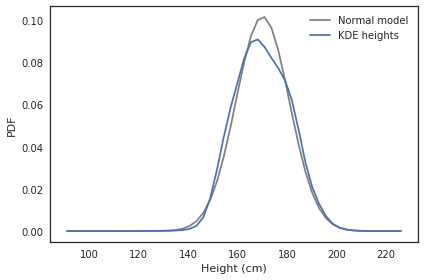

In [37]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

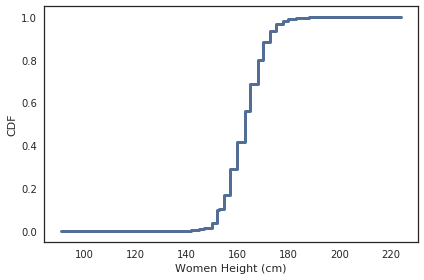

In [38]:
w_heights = brfss[brfss.SEX == 2].HTM4

cdf_w_heights = Cdf(w_heights)
thinkplot.Cdf(cdf_w_heights)

decorate(xlabel='Women Height (cm)', ylabel='CDF')

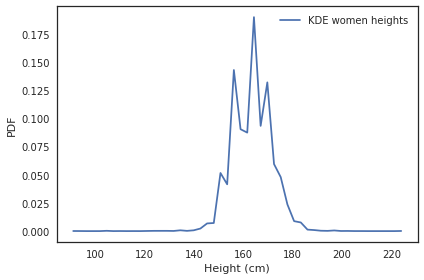

In [39]:
kde = gaussian_kde(w_heights.dropna())

xs = np.linspace(w_heights.min(), w_heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE women heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

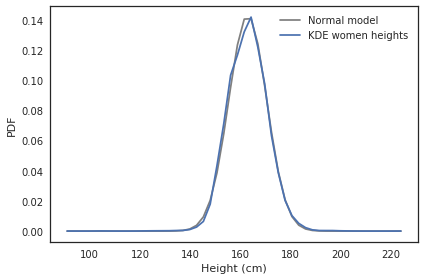

In [40]:
kde = gaussian_kde(w_heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

mean = w_heights.mean()
std = w_heights.std()

normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE women heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

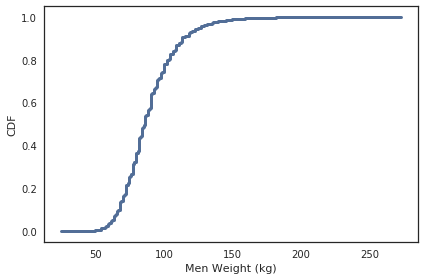

In [44]:
m_weight = brfss[brfss.SEX == 1].WTKG3

cdf_m_weight = Cdf(m_weight)
thinkplot.Cdf(cdf_m_weight)

decorate(xlabel='Men Weight (kg)', ylabel='CDF')

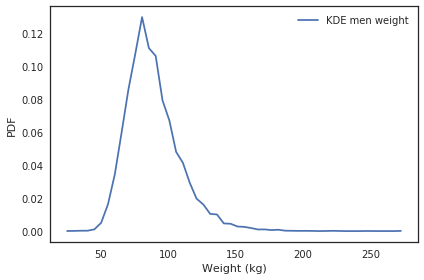

In [45]:
kde = gaussian_kde(m_weight.dropna())

xs = np.linspace(m_weight.min(), m_weight.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE men weight')

decorate(xlabel='Weight (kg)', ylabel='PDF')

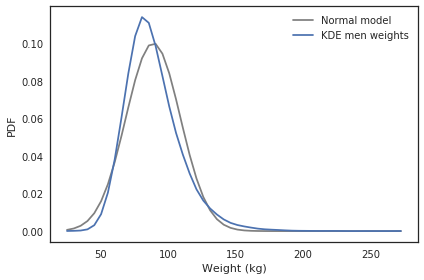

In [46]:
kde = gaussian_kde(m_weight.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

mean = m_weight.mean()
std = m_weight.std()

normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE men weights')

decorate(xlabel='Weight (kg)', ylabel='PDF')

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

In [47]:
m_weight = np.log10(m_weight)

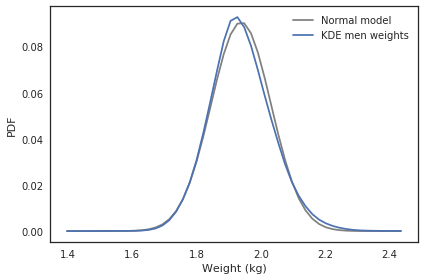

In [49]:
kde = gaussian_kde(m_weight.dropna(), bw_method=0.3)

xs = np.linspace(m_weight.min(), m_weight.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

ds = kde.evaluate(xs)
ds /= ds.sum()

mean = m_weight.mean()
std = m_weight.std()

normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE men weights')

decorate(xlabel='Weight (kg)', ylabel='PDF')

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [50]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [51]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [52]:
male_weights.mean(), male_weights.median()

(88.83871202341662, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [53]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [54]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

In [55]:
female_weights.mean(), female_weights.median()

(73.6243871435631, 70.31)

In [56]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

In [57]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.5268415056705406

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

In [93]:
import utils

dct = utils.read_stata_dict('./gss_eda/GSS.dct')
gss = dct.read_fixed_width('./gss_eda/GSS.dat.gz',
                             compression='gzip')
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


In [101]:
gss.chldidel.replace([8, 9, -1], np.nan, inplace=True) 
gss.chldidel.dropna()

ideal_c = gss['chldidel'] #ideal number of children

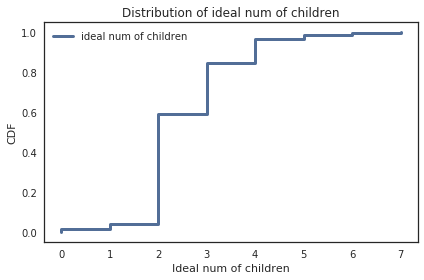

In [102]:
cdf_ideal_c = Cdf(gss.chldidel)
thinkplot.cdf(cdf_ideal_c, label='ideal num of children')

decorate(title='Distribution of ideal num of children', 
         xlabel='Ideal num of children', 
         ylabel='CDF')

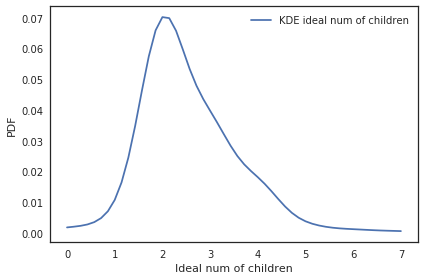

In [118]:
kde = gaussian_kde(ideal_c.dropna(), bw_method=0.5)

xs = np.linspace(ideal_c.min(), ideal_c.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE ideal num of children')

decorate(xlabel='Ideal num of children', ylabel='PDF')

In [115]:
ideal_c.skew()

1.137147160024296

In [116]:
thinkstats2.PearsonMedianSkewness(ideal_c.dropna())

1.7412769630074565

In [132]:
recent = (gss.year > 2000)
r_ideal_c = gss.loc[recent, 'chldidel']

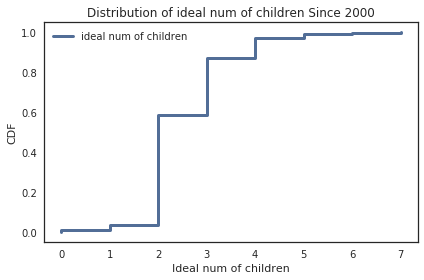

In [133]:
cdf_r_ideal_c = Cdf(r_ideal_c)
thinkplot.cdf(cdf_r_ideal_c, label='ideal num of children')

decorate(title='Distribution of ideal num of children Since 2000', 
         xlabel='Ideal num of children', 
         ylabel='CDF')

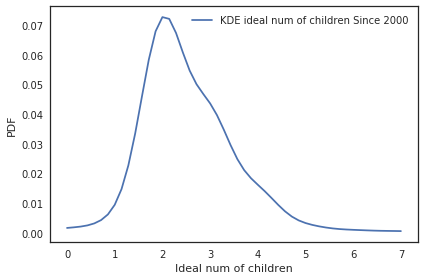

In [134]:
kde = gaussian_kde(r_ideal_c.dropna(), bw_method=0.5)

xs = np.linspace(r_ideal_c.min(), r_ideal_c.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE ideal num of children Since 2000')

decorate(xlabel='Ideal num of children', ylabel='PDF')

In [135]:
r_ideal_c.skew(), thinkstats2.PearsonMedianSkewness(r_ideal_c.dropna())

(1.1468884287379164, 1.781779509337701)

In [136]:
print(ideal_c.mean(), ideal_c.std())
print(r_ideal_c.mean(), r_ideal_c.std())

2.556574063659881 0.9589202073194736
2.5384615384615383 0.9066590288430857


From these figures, we can see that ideal number of children is heavily right skewed, meaning that a normal distribution is not a good descriptor. Accordingly, I calculated the skew and found the Pearson Median Skew to be greater than the moment based skew, indicating a robust validation of the heavy reight skew. Comparing the means between the entire sample population and those survayed after 2000, the ideal number of kids seems to be about the same. There is a slightly larger standard deviation in the recent sample, possibly suggesting that openness to a wider range of number of children has increased. However, the number of valid cases has decreased in recent years so this could also explain differences. 